In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

#ARIMA is a more general model that include ARMA as a special case (AR-I-MA).
#It has 3 parameters. To obtain an ARMA is enough to set the central parameter to zero. 
from statsmodels.tsa.arima.model import ARIMA


from statsmodels.stats.diagnostic import acorr_ljungbox


In [80]:
sm.__version__

'0.14.1'

In [81]:
S = pd.read_csv('synthetic_ARMA.csv')

In [82]:
#Check the loaded dataframe
S

,S1,S2
0,-0.446319,0.576042
1,-0.105804,1.046018
2,0.579134,0.630641
3,-0.149433,0.108865
4,-1.110220,0.383786
...,...,...
9995,-0.125624,1.217106
9996,-0.149925,1.104462
9997,0.395922,0.384783
9998,0.206738,-0.362712


In [83]:
s1,s2 = S['S1'].values,S['S2'].values

# Time series S1 

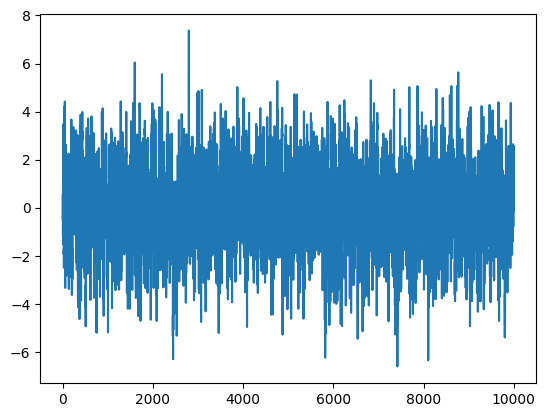

In [84]:
#Inspect visually the time-series
plt.plot(s1)

In [85]:
#it looks stationary

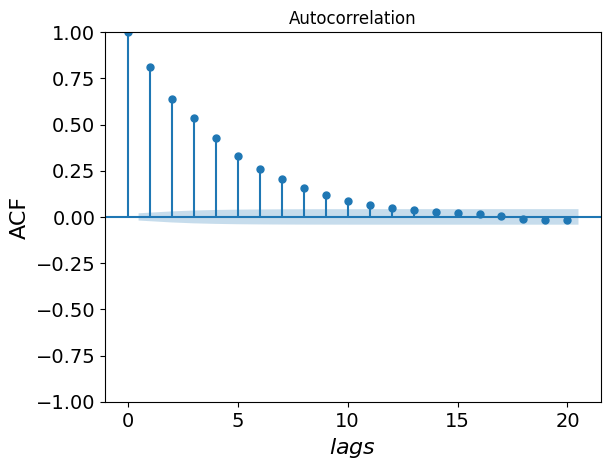

In [86]:
#The ACF is a decreasing. Almost 9 lags significant

sm.graphics.tsa.plot_acf(s1, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

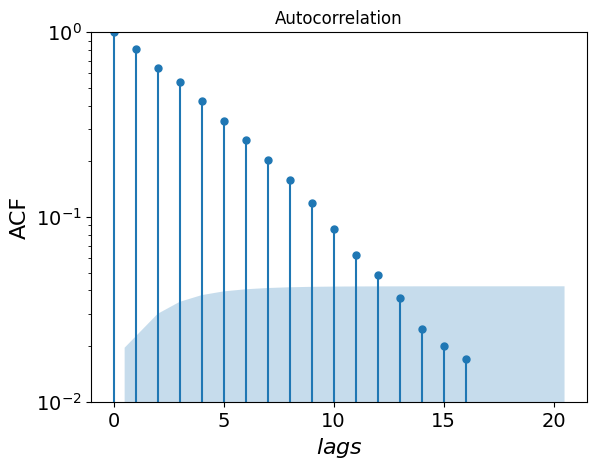

In [87]:
#In a lin-log plot is not perfectly linear. Probably is not a pure AR(1)

sm.graphics.tsa.plot_acf(s1, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.yscale('log')
plt.ylim(ymin=1e-2)
plt.show()

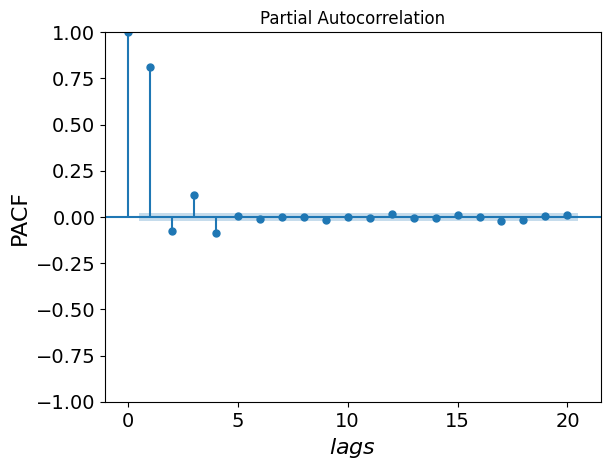

In [88]:
#The PACF has only 4 significant lags.

sm.graphics.tsa.plot_pacf(s1, lags=20,method='ywm')
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [89]:
# We can reject pure MA(q) model (unless we want to consider q>10, but it is too complex)
# Possible models are: AR(4),ARMA(1,1),ARMA(2,1),ARMA(1,2),ARMA(2,2)


In [90]:
#The first number refers to the order of the AR the second to the oreder of MA
#I added models more complex like (4,1),(4,2),(5,1)
models = [(4,0),(1,1),(2,1),(1,2),(2,2),(3,1),(4,1),(5,1),(4,2)]

In [91]:
#Check the help
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima.model:

class ARIMA(statsmodels.tsa.statespace.sarimax.SARIMAX)
 |  ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
 |  
 |  Autoregressive Integrated Moving Average (ARIMA) model, and extensions
 |  
 |  This model is the basic interface for ARIMA-type models, including those
 |  with exogenous regressors and those with seasonal components. The most
 |  general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
 |  all specialized cases, including
 |  
 |  - autoregressive models: AR(p)
 |  - moving average models: MA(q)
 |  - mixed autoregressive moving average models: ARMA(p, q)
 |  - integration models: ARIMA(p, d, q)
 |  - seasonal models: SARIMA(P, D, Q, s)
 |  - regression with errors that follow one of the above ARIM

In [92]:
#Check the help of the fit
help(ARIMA(s1,order=(1,0,1)).fit)

Help on method fit in module statsmodels.tsa.arima.model:

fit(start_params=None, transformed=True, includes_fixed=False, method=None, method_kwargs=None, gls=None, gls_kwargs=None, cov_type=None, cov_kwds=None, return_params=False, low_memory=False) method of statsmodels.tsa.arima.model.ARIMA instance
    Fit (estimate) the parameters of the model.
    
    Parameters
    ----------
    start_params : array_like, optional
        Initial guess of the solution for the loglikelihood maximization.
        If None, the default is given by Model.start_params.
    transformed : bool, optional
        Whether or not `start_params` is already transformed. Default is
        True.
    includes_fixed : bool, optional
        If parameters were previously fixed with the `fix_params` method,
        this argument describes whether or not `start_params` also includes
        the fixed parameters, in addition to the free parameters. Default
        is False.
    method : str, optional
        The m

In [93]:
# I create a diction with the result of the fits
M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(s1,order=(p,0,q)).fit()
    M[p,q] = ft


4 0
1 1
2 1


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2
2 2
3 1
4 1
5 1
4 2


In [94]:
#The result of the fit is an object with some methods.
#For example summary. But you can access individual elements also.

M[(2,1)].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -14219.335
Date:                Mon, 16 Sep 2024   AIC                          28448.669
Time:                        16:45:29   BIC                          28484.721
Sample:                             0   HQIC                         28460.872
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0205      0.051     -0.402      0.688      -0.120       0.079
ar.L1          0.2442      0.042      5.830      0.000       0.162       0.326
ar.L2          0.4266      0.036     11.830      0.000       0.356       0.497
ma.L1          0.6726      0.038     17.793      0.000       0.598       0.747
sigma2         1.0059      0.014     70.232      0.000       0.978       1.034
===================================================================================
Ljung-Box (L1) (Q):                   4.35   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.04   Prob(JB):                         0.63
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
#To know which element try to write the model on a variable
ft = M[(1,2)]

#then write ft and press tab

In [96]:
#As you can see extract the AIC.
#We can create a DataFrame to have a global vision of all the regressors

In [97]:
AIC = pd.DataFrame( [((p,q),ft.aic) for (p,q),ft in M.items()],columns=['model','AIC'] ) 

AIC

,model,AIC
0,"(4, 0)",28389.966130
1,"(1, 1)",28577.542485
2,"(2, 1)",28448.669023
3,"(1, 2)",28434.838247
4,"(2, 2)",28411.138527
5,"(3, 1)",28402.616107
6,"(4, 1)",28391.375183
7,"(5, 1)",28393.049089
8,"(4, 2)",28392.374942


In [98]:
#We are not insterested in the absolute value but in de difference with the minimum values
AIC = AIC.assign(dAIC=(AIC.AIC - AIC.AIC.min()))

AIC.sort_values('AIC')

,model,AIC,dAIC
0,"(4, 0)",28389.966130,0.000000
6,"(4, 1)",28391.375183,1.409053
8,"(4, 2)",28392.374942,2.408813
7,"(5, 1)",28393.049089,3.082960
5,"(3, 1)",28402.616107,12.649978
4,"(2, 2)",28411.138527,21.172397
3,"(1, 2)",28434.838247,44.872117
2,"(2, 1)",28448.669023,58.702893
1,"(1, 1)",28577.542485,187.576356


In [99]:
#Maybe is more convenient to reset the index
AIC = AIC.sort_values('AIC').reset_index(drop=True)
AIC

,model,AIC,dAIC
0,"(4, 0)",28389.966130,0.000000
1,"(4, 1)",28391.375183,1.409053
2,"(4, 2)",28392.374942,2.408813
3,"(5, 1)",28393.049089,3.082960
4,"(3, 1)",28402.616107,12.649978
5,"(2, 2)",28411.138527,21.172397
6,"(1, 2)",28434.838247,44.872117
7,"(2, 1)",28448.669023,58.702893
8,"(1, 1)",28577.542485,187.576356


In [100]:
#The possible models are 0 and 1. Then also 2 and 3 could be considered

In [101]:
p,q = AIC.model[0]

In [102]:
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -14188.983
Date:                Mon, 16 Sep 2024   AIC                          28389.966
Time:                        16:45:29   BIC                          28433.228
Sample:                             0   HQIC                         28404.610
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0199      0.052     -0.382      0.702      -0.122       0.082
ar.L1          0.8956      0.010     90.036      0.000       0.876       0.915
ar.L2         -0.1961      0.013    -15.080      0.000      -0.222      -0.171
ar.L3          0.1955      0.013     14.743      0.000       0.170       0.221
ar.L4         -0.0873      0.010     -8.856      0.000      -0.107      -0.068
sigma2         0.9998      0.014     70.202      0.000       0.972       1.028
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.95   Prob(JB):                         0.61
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
#All 4 AR paramters are significant. Let us check the residue

In [104]:
r = M[p,q].resid
r

array([-0.42643871,  0.26110531,  0.64157622, ...,  0.16001394,
        0.0778865 , -0.82620452])

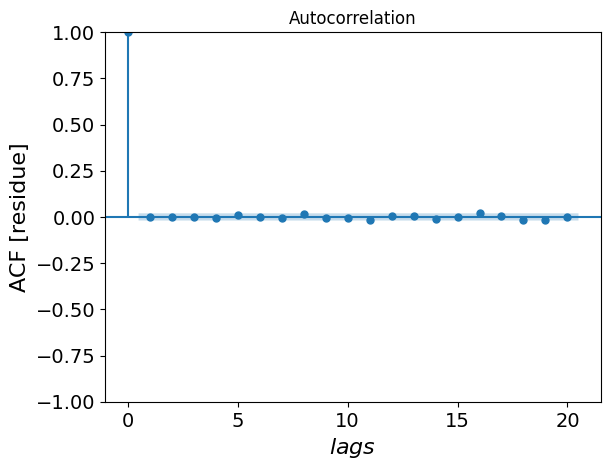

In [105]:
#Let us plot the ACF. If the model is correct we should expect something uncorrelated.
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [106]:
#Check the help
help(acorr_ljungbox)

Help on function acorr_ljungbox in module statsmodels.stats.diagnostic:

acorr_ljungbox(x, lags=None, boxpierce=False, model_df=0, period=None, return_df=True, auto_lag=False)
    Ljung-Box test of autocorrelation in residuals.
    
    Parameters
    ----------
    x : array_like
        The data series. The data is demeaned before the test statistic is
        computed.
    lags : {int, array_like}, default None
        If lags is an integer then this is taken to be the largest lag
        that is included, the test result is reported for all smaller lag
        length. If lags is a list or array, then all lags are included up to
        the largest lag in the list, however only the tests for the lags in
        the list are reported. If lags is None, then the default maxlag is
        min(10, nobs // 5). The default number of lags changes if period
        is set.
    boxpierce : bool, default False
        If true, then additional to the results of the Ljung-Box test also the
     

In [107]:
# they seems not significant, let us check with ljungbox

#Including model DF you correct the estimation from the overfitting (Check the slides)
acorr_ljungbox(r,lags=range(p+q+10),model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
0,7.027362,NaN
1,0.003596,NaN
2,0.035050,NaN
3,0.068260,NaN
4,0.421706,NaN
5,1.124360,0.288981
6,1.167740,0.557736
7,1.559268,0.668660
8,4.059652,0.397993
9,4.508296,0.478774


In [108]:
# The pvalue is consistent with a random noise. The model 0 can be accepted.

#We could stop also here since this model is better in terms of AIC and is simpler than the other.
#Let check anyway the other to show you what you should expect

In [109]:
p,q = AIC.model[1]

In [110]:
p,q

(4, 1)

In [111]:
#Note that the MA paramter is not sifnificant and also the second of the AR.
#It is possible to have non significant parameters, but if you have a better model you should avoid these cases. 
M[p,q].summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(4, 0, 1)   Log Likelihood              -14188.688
Date:                Mon, 16 Sep 2024   AIC                          28391.375
Time:                        16:45:29   BIC                          28441.848
Sample:                             0   HQIC                         28408.460
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0202      0.052     -0.386      0.700      -0.123       0.083
ar.L1          0.7970      0.115      6.960      0.000       0.573       1.021
ar.L2         -0.1088      0.102     -1.067      0.286      -0.309       0.091
ar.L3          0.1777      0.025      7.112      0.000       0.129       0.227
ar.L4         -0.0755      0.018     -4.305      0.000      -0.110      -0.041
ma.L1          0.0994      0.115      0.866      0.386      -0.125       0.324
sigma2         0.9997      0.014     70.204      0.000       0.972       1.028
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.02
Prob(Q):                              1.00   Prob(JB):                         0.60
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
#Check the residue
r = M[p,q].resid

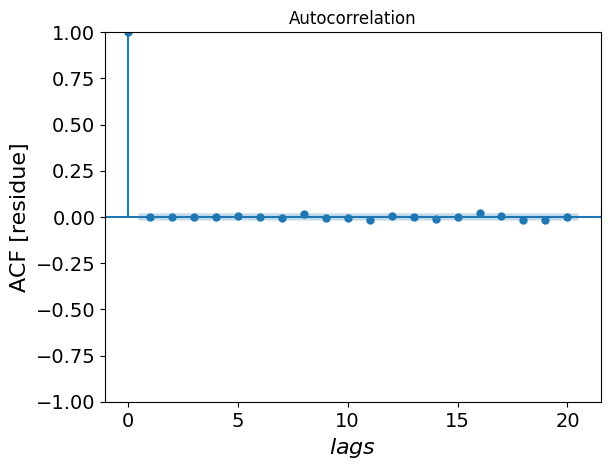

In [113]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [114]:
# they seems not significant, let us check with ljungbox

acorr_ljungbox(r,lags=range(p+q+10),model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
0,7.600366e+00,NaN
1,1.088736e-07,NaN
2,3.789116e-03,NaN
3,1.706031e-02,NaN
4,2.993349e-02,NaN
5,3.385946e-01,NaN
6,3.504983e-01,0.553831
7,8.902541e-01,0.640743
8,2.968885e+00,0.396447
9,3.616505e+00,0.460386


In [115]:
#It can be also accepted, however the first model is simpler. Less parameters
#Also the additional parameter of the second model are non significant

# Time series S2 

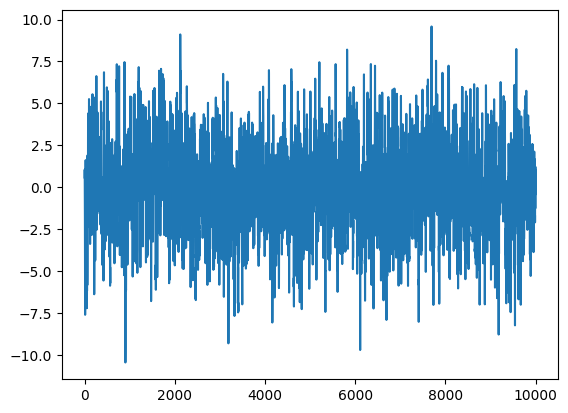

In [116]:
plt.plot(s2)

In [117]:
#it looks stationary

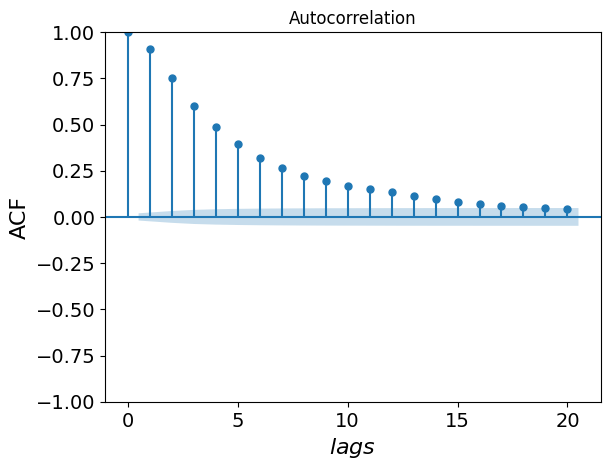

In [118]:
sm.graphics.tsa.plot_acf(s2, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

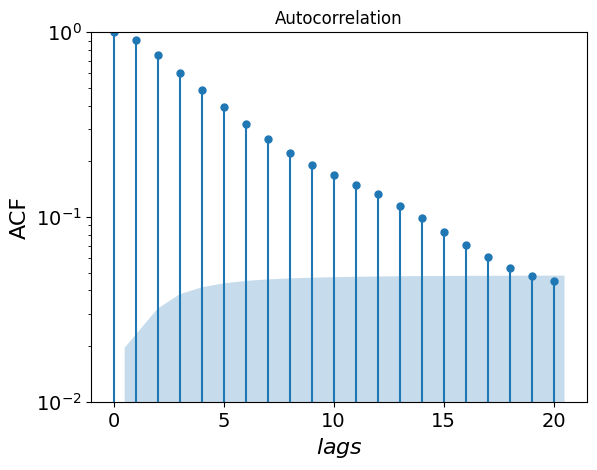

In [119]:
#It is slightly more linear this one. We have 16 lags significant.
sm.graphics.tsa.plot_acf(s2, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.yscale('log')
plt.ylim(ymin=1e-2)
plt.show()

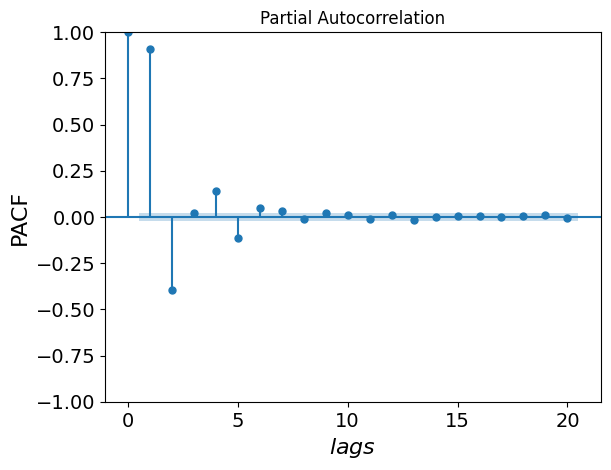

In [120]:
#Approximately 5 (or 6) lags significant 
sm.graphics.tsa.plot_pacf(s2, lags=20,method='ywm')
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [121]:
# We can reject pure MA(q) model (unless we want to consider q>15, but it is too complex)
# ACF for h small seem to decrease slower than for h large. It might be an indication of an ARMA

# Possible models are: AR(5),ARMA(1,1),ARMA(2,1),ARMA(1,2),ARMA(2,2).. check a few ARMAs
# Maybe with trend

In [122]:
#I added a few more as before to show you the outputs
models = [(5,0),(1,1),(2,1),(1,2),(2,2),(3,1),(3,2),(3,3),(4,1),(5,1),(4,2)]

In [123]:
M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(s2,order=(p,0,q)).fit()
    M[p,q] = ft


5 0
1 1
2 1
1 2
2 2
3 1
3 2
3 3


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 1
5 1
4 2


In [124]:
AIC = pd.DataFrame( [( (p,q),ft.aic) for (p,q),ft in M.items()],columns=['model','AIC'] ) 

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))

AIC.sort_values('AIC')

,model,AIC,dAIC
4,"(2, 2)",28254.037302,0.000000
6,"(3, 2)",28255.261560,1.224258
10,"(4, 2)",28257.261455,3.224153
7,"(3, 3)",28257.319657,3.282356
9,"(5, 1)",28278.100872,24.063570
0,"(5, 0)",28288.635406,34.598105
8,"(4, 1)",28304.043058,50.005757
3,"(1, 2)",28317.021109,62.983807
5,"(3, 1)",28511.617631,257.580330
2,"(2, 1)",28611.079199,357.041897


In [125]:
#Two possible sigificant models. Let inspect the parameters
#The first is simpler than the second

In [126]:
AIC = AIC.sort_values('AIC').reset_index(drop=True)

In [127]:
p,q = AIC.model[0]
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -14121.019
Date:                Mon, 16 Sep 2024   AIC                          28254.037
Time:                        16:45:57   BIC                          28297.299
Sample:                             0   HQIC                         28268.681
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.084     -0.937      0.349      -0.244       0.086
ar.L1          0.4973      0.032     15.491      0.000       0.434       0.560
ar.L2          0.2448      0.029      8.358      0.000       0.187       0.302
ma.L1          0.7933      0.030     26.269      0.000       0.734       0.853
ma.L2          0.3940      0.013     31.114      0.000       0.369       0.419
sigma2         0.9862      0.014     69.753      0.000       0.958       1.014
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.94   Prob(JB):                         0.16
Heteroskedasticity (H):               0.98   Skew:                            -0.04
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
#All 2 AR and 2 MA paramters are significant. Let us check the residue

In [129]:
r = M[p,q].resid

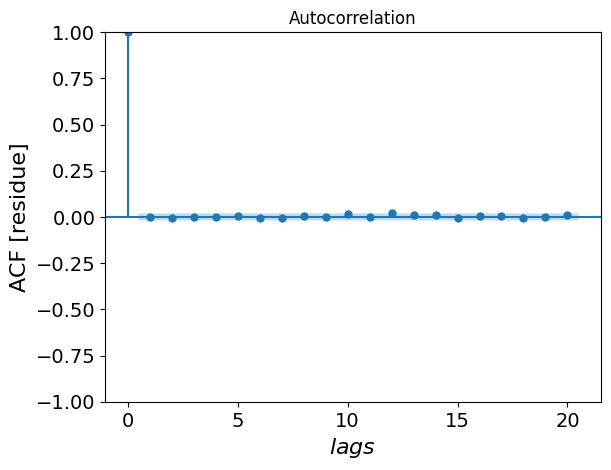

In [130]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [131]:
# they seems not significant, let us check with ljungbox

acorr_ljungbox(r,lags=range(p+q+20),model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
0,15.644689,NaN
1,0.005071,NaN
2,0.104541,NaN
3,0.125092,NaN
4,0.149821,NaN
5,0.251514,0.616011
6,0.846829,0.654807
7,1.166759,0.760987
8,1.267737,0.866825
9,1.270966,0.937891


In [132]:
# The pvalue is consistent with a random noise. Accepted!
# There is no sense in going for a more complex model if this is ok

# SIMULATE AN ARMA

In [133]:
#Check the help. You can find an example to simulate it
help(sm.tsa.arma_generate_sample)

Help on function arma_generate_sample in module statsmodels.tsa.arima_process:

arma_generate_sample(ar, ma, nsample, scale=1, distrvs=None, axis=0, burnin=0)
    Simulate data from an ARMA.
    
    Parameters
    ----------
    ar : array_like
        The coefficient for autoregressive lag polynomial, including zero lag.
    ma : array_like
        The coefficient for moving-average lag polynomial, including zero lag.
    nsample : int or tuple of ints
        If nsample is an integer, then this creates a 1d timeseries of
        length size. If nsample is a tuple, creates a len(nsample)
        dimensional time series where time is indexed along the input
        variable ``axis``. All series are unless ``distrvs`` generates
        dependent data.
    scale : float
        The standard deviation of noise.
    distrvs : function, random number generator
        A function that generates the random numbers, and takes ``size``
        as argument. The default is np.random.standard_nor

In [134]:
import numpy as np
import statsmodels.api as sm

#Just to have the same time-series for all the class
np.random.seed(0)

arparams = np.array([0.7,-0.2,0.2])
maparams = np.array([0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate (check the help)
ma = np.r_[1, maparams] # add zero-lag (check the help)

#dump will remove the first 100 observations
dump=100 # Just to be sure to remove boundary effects. Probably 10 might be enough.
T=600 #Length
s = sm.tsa.arma_generate_sample(ar, ma,T,burnin=dump )

In [135]:
ar

array([ 1. , -0.7,  0.2, -0.2])

In [136]:
ma

array([1. , 0.4])

Text(0, 0.5, '$X_t$')

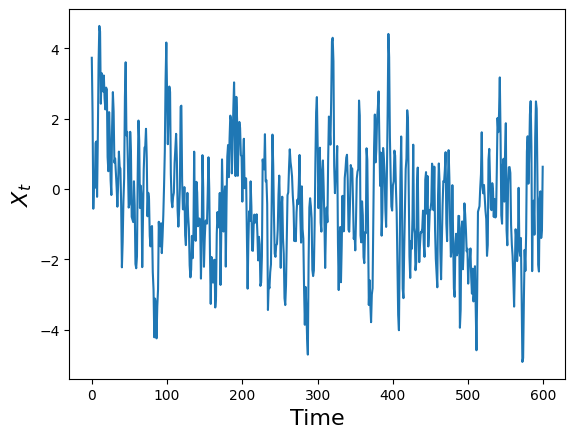

In [137]:
plt.plot(s) #Plot alawys
plt.xlabel('Time',fontsize=16)
plt.ylabel('$X_t$',fontsize=16)

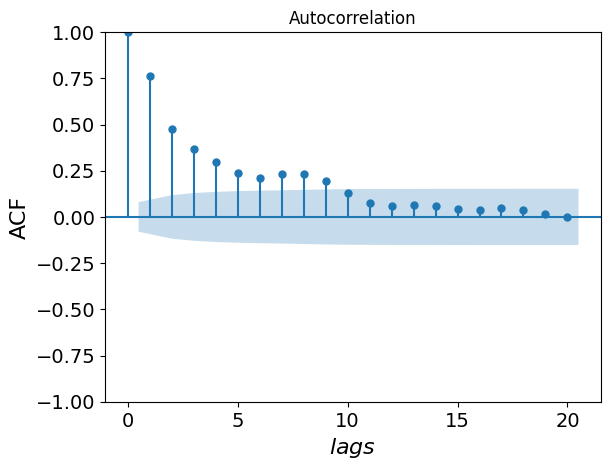

In [138]:
#There is no sens in using the lin-log plot. We are sure that is not exponenzial
#Maybe the first 3 points, but 3 points are not enough to visualize correctly a trend
sm.graphics.tsa.plot_acf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

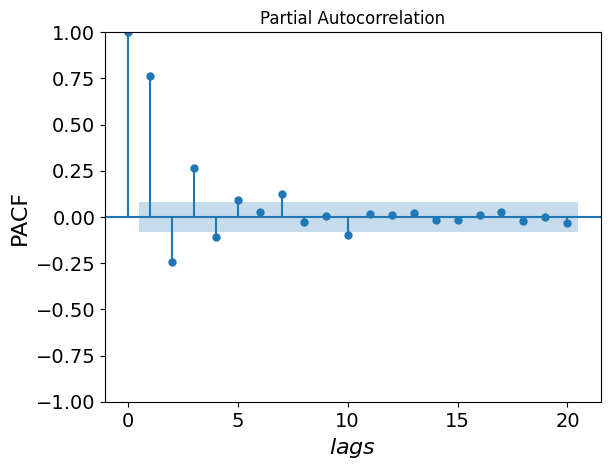

In [139]:
#Observe that even though the model is ARMA(2,1) on both cases we have signifiant (P)ACF till lags=10
sm.graphics.tsa.plot_pacf(s, lags=20,method='ywm')
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [140]:
#, or complex ARMA. No pure MA. 
#Of course also more complex AR, but we are on the border of significance. Remeber that T=600

In [141]:
models = [(4,0),(1,1),(2,1),
          (1,2),(2,2),(3,1)] #I included this one only because I know, otherwise is very unlikely from visual inspection

In [142]:
M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(s,order=(p,0,q)).fit()
    M[p,q] = ft


4 0
1 1
2 1
1 2


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 2
3 1


In [143]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))


AIC.sort_values('AIC')

,model,AIC,dAIC
4,"(2, 2)",1713.526339,0.000000
3,"(1, 2)",1713.946893,0.420554
5,"(3, 1)",1717.319482,3.793143
2,"(2, 1)",1717.716151,4.189812
0,"(4, 0)",1722.289192,8.762854
1,"(1, 1)",1724.157635,10.631297


In [144]:
AIC = AIC.sort_values('AIC').reset_index(drop=True)

In [145]:
# Possible modeles are ARMA(2,2), ARMA(1,2). Maybe ARMA(3,1) and ARMA(2,1). The correct model is low in the rank

In [146]:
p,q = AIC.model[0] #ma.1 is not significant
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -850.763
Date:                Mon, 16 Sep 2024   AIC                           1713.526
Time:                        16:45:59   BIC                           1739.908
Sample:                             0   HQIC                          1723.796
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3678      0.203     -1.811      0.070      -0.766       0.030
ar.L1          1.1405      0.151      7.571      0.000       0.845       1.436
ar.L2         -0.2291      0.105     -2.187      0.029      -0.434      -0.024
ma.L1         -0.0695      0.147     -0.473      0.636      -0.357       0.218
ma.L2         -0.4734      0.075     -6.345      0.000      -0.620      -0.327
sigma2         0.9957      0.060     16.715      0.000       0.879       1.112
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.84   Prob(JB):                         0.73
Heteroskedasticity (H):               1.00   Skew:                            -0.05
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
p,q = AIC.model[1] #These are all significant
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -851.973
Date:                Mon, 16 Sep 2024   AIC                           1713.947
Time:                        16:45:59   BIC                           1735.932
Sample:                             0   HQIC                          1722.505
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3754      0.177     -2.122      0.034      -0.722      -0.029
ar.L1          0.7772      0.050     15.535      0.000       0.679       0.875
ma.L1          0.2849      0.070      4.095      0.000       0.149       0.421
ma.L2         -0.2967      0.065     -4.558      0.000      -0.424      -0.169
sigma2         0.9997      0.060     16.705      0.000       0.882       1.117
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.92   Prob(JB):                         0.67
Heteroskedasticity (H):               1.00   Skew:                            -0.06
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
#Finally the real correct model (But we are cheating, we know that is the correct only because we generate it) 
p,q = AIC.model[2] #AR.2 not significant are AR.3 on the border. 
#Not great indeed, it's like an ARMA(1,1) the other 2 parameters are probably just overfitted.
#If you see the coefficients they are also quite wrong
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -852.660
Date:                Mon, 16 Sep 2024   AIC                           1717.319
Time:                        16:45:59   BIC                           1743.701
Sample:                             0   HQIC                          1727.589
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3775      0.168     -2.247      0.025      -0.707      -0.048
ar.L1          0.4877      0.097      5.048      0.000       0.298       0.677
ar.L2          0.0214      0.112      0.191      0.849      -0.198       0.241
ar.L3          0.1117      0.057      1.954      0.051      -0.000       0.224
ma.L1          0.5883      0.094      6.231      0.000       0.403       0.773
sigma2         1.0021      0.060     16.686      0.000       0.884       1.120
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.81   Prob(JB):                         0.73
Heteroskedasticity (H):               1.00   Skew:                            -0.06
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
# Let us inspect for all of them the residue

In [150]:
residues = {params: M[p,q].resid for (p,q) in AIC.model.iloc[:3]}

NameError: name 'params' is not defined

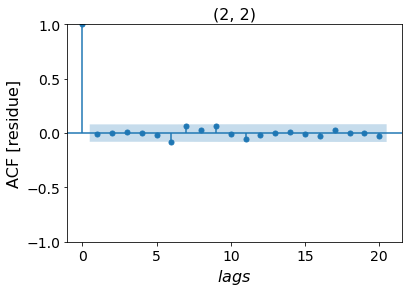

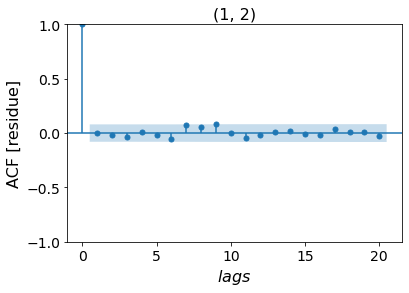

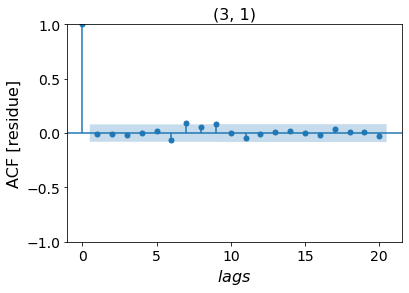

In [308]:
for params,r in rs.items():
    sm.graphics.tsa.plot_acf(r, lags=20)
    plt.xlabel(r'$lags$',fontsize=16)
    plt.ylabel('ACF [residue]',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.title(params,fontsize=16)
    plt.show()

In [309]:
# They seems all good. Except for ARMA(3,1). Let us try with ljungbox test

In [310]:
p,q = AIC.model[0]
print(p,q)
acorr_ljungbox(M[p,q].resid,lags=range(p+q+10),model_df=p+q,return_df=True)

2 2


,lb_stat,lb_pvalue
0,11.358202,NaN
1,0.059095,NaN
2,0.059892,NaN
3,0.087491,NaN
4,0.087814,NaN
5,0.282879,0.594820
6,3.985763,0.136302
7,6.295255,0.098096
8,6.933829,0.139427
9,9.345149,0.096064


In [311]:
p,q = AIC.model[1]
print(p,q)
acorr_ljungbox(M[p,q].resid,lags=range(p+q+10),model_df=p+q,return_df=True)

1 2


,lb_stat,lb_pvalue
0,13.888982,NaN
1,0.003138,NaN
2,0.155455,NaN
3,0.865950,NaN
4,0.987360,0.320388
5,1.212552,0.545378
6,3.086038,0.378549
7,6.450317,0.167948
8,8.677282,0.122650
9,12.661283,0.048741


In [313]:
p,q = AIC.model[2]
print(p,q) #Ironically the real model is the only one on the border of rejection Lag=9
acorr_ljungbox(M[p,q].resid,lags=range(p+q+10),model_df=p+q,return_df=True) 

3 1


,lb_stat,lb_pvalue
0,15.816861,NaN
1,0.076195,NaN
2,0.168165,NaN
3,0.318979,NaN
4,0.327788,NaN
5,0.516664,0.472268
6,2.656152,0.264987
7,7.858293,0.049033
8,9.912955,0.041920
9,14.639762,0.012018


In [316]:
#ARMA(1,2) is simpler and all parameter significant.
#We can accept this one.

In [315]:
#Real Model was ARMA(3,1) but it was rejected. Why?

#Answer: Small sample size, and higher order parameter too close to zero. 

# Increase the strength of the higher order parameters 

In [349]:
#Just to have the same time-series for all the class
np.random.seed(0)

arparams = np.array([0.7,-0.4,0.4]) #this time 0.2 -> 0.4 [higher strength]
maparams = np.array([0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

dump=100
T=600  # Same legnth
s = sm.tsa.arma_generate_sample(ar, ma,T,burnin=dump )

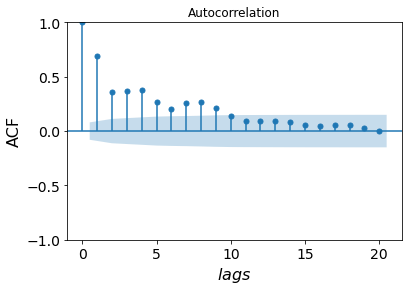

In [350]:
sm.graphics.tsa.plot_acf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


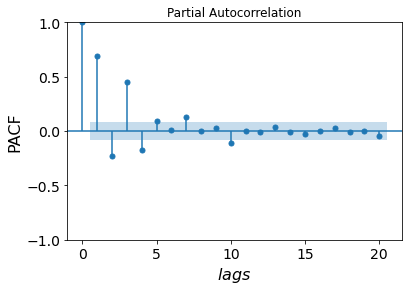

In [351]:
sm.graphics.tsa.plot_pacf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [352]:
#Let's try excetly the same as before
models = [(4,0),(1,1),(2,1),
          (1,2),(2,2),(3,1)] 

In [353]:
M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(s,order=(p,0,q)).fit()
    M[p,q] = ft


4 0
1 1
2 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2
2 2
3 1


In [354]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))

AIC.sort_values('AIC') #This time the 3,1 is the best, the only good one

,model,AIC,dAIC
5,"(3, 1)",1718.234230,0.000000
0,"(4, 0)",1723.226549,4.992318
4,"(2, 2)",1734.976147,16.741917
3,"(1, 2)",1736.105335,17.871105
2,"(2, 1)",1760.201748,41.967518
1,"(1, 1)",1760.499204,42.264974


In [355]:
AIC = AIC.sort_values('AIC').reset_index(drop=True)

In [362]:
# This time (3,1). We can have a look at (4,0) if the first one fails.

In [363]:
params =  AIC.model[0] 
print(params)
M[params].summary()

(3, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -853.117
Date:                Tue, 26 Apr 2022   AIC                           1718.234
Time:                        09:29:00   BIC                           1744.616
Sample:                             0   HQIC                          1728.504
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3760      0.174     -2.159      0.031      -0.717      -0.035
ar.L1          0.6412      0.068      9.448      0.000       0.508       0.774
ar.L2         -0.3459      0.075     -4.584      0.000      -0.494      -0.198
ar.L3          0.3759      0.045      8.295      0.000       0.287       0.465
ma.L1          0.4318      0.071      6.068      0.000       0.292       0.571
sigma2         1.0031      0.059     16.865      0.000       0.887       1.120
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.83   Prob(JB):                         0.77
Heteroskedasticity (H):               1.02   Skew:                            -0.06
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [364]:
params =  AIC.model[0] 

In [365]:
#All significant, and quite close to real parameters

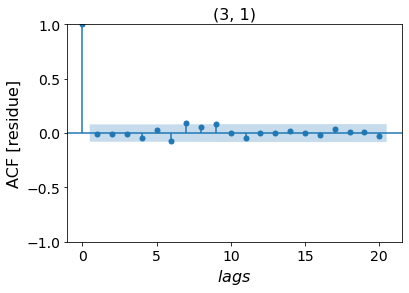

In [366]:
r = M[params].resid
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.title(params,fontsize=16)
plt.show()

In [367]:
p,q = params # The pvalues are not very good. We are underfitting something
acorr_ljungbox(r,lags=range(p+q+10),model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
0,18.108703,NaN
1,0.050723,NaN
2,0.092587,NaN
3,0.107709,NaN
4,1.405147,NaN
5,1.761882,0.184390
6,5.026069,0.081022
7,10.109195,0.017660
8,12.144811,0.016306
9,16.713197,0.005077


In [369]:
params =  AIC.model[1] 
print(params)
M[params].summary() #All significant

(4, 0)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -855.613
Date:                Tue, 26 Apr 2022   AIC                           1723.227
Time:                        09:29:41   BIC                           1749.608
Sample:                             0   HQIC                          1733.496
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3769      0.169     -2.230      0.026      -0.708      -0.046
ar.L1          1.0495      0.040     26.012      0.000       0.970       1.129
ar.L2         -0.7417      0.056    -13.342      0.000      -0.851      -0.633
ar.L3          0.6251      0.055     11.356      0.000       0.517       0.733
ar.L4         -0.1713      0.042     -4.058      0.000      -0.254      -0.089
sigma2         1.0115      0.059     17.117      0.000       0.896       1.127
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.79   Prob(JB):                         0.81
Heteroskedasticity (H):               1.03   Skew:                            -0.06
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [370]:
params =  AIC.model[1] 

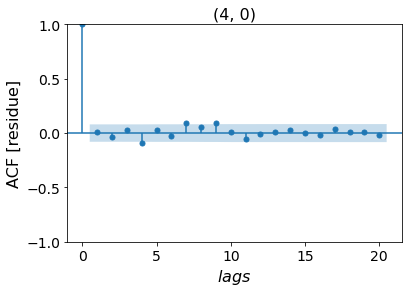

In [371]:
r = M[params].resid
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.title(params,fontsize=16)
plt.show()

In [372]:
p,q = params
acorr_ljungbox(r,lags=range(p+q+10),model_df=p+q,return_df=True) #Also this one underfit something

,lb_stat,lb_pvalue
0,21.360395,NaN
1,0.064596,NaN
2,1.031910,NaN
3,1.427737,NaN
4,6.636754,NaN
5,7.077529,0.007806
6,7.649513,0.021824
7,12.425532,0.006059
8,14.602982,0.005600
9,19.557253,0.001513


In [185]:
# Both cases have very low pvalues. This means that we are underfitting.

In [373]:
# ARMA(3,1) has a lower AIC, is simpler (less lag in the past)
#and we don't see any resonable advantage of ARMA(4,0)

In [374]:
# This time we identified the correct model, but the parameter estimation fails.
# In fact our regression left out serial correlations in the residue

# Increase time-series length 

In [375]:
import numpy as np
import statsmodels.api as sm

#Just to have the same time-series for all the class
np.random.seed(0)

arparams = np.array([0.7,-0.2,0.2])  # low strength
maparams = np.array([0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

dump=100
T=1500  # longer time-series 600 -> 1500
s = sm.tsa.arma_generate_sample(ar, ma,T,burnin=dump )

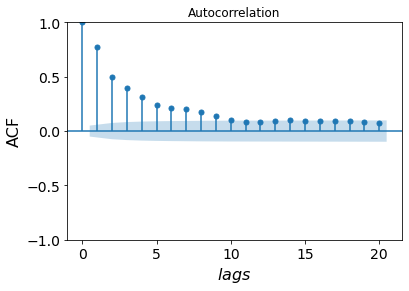

In [376]:
sm.graphics.tsa.plot_acf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


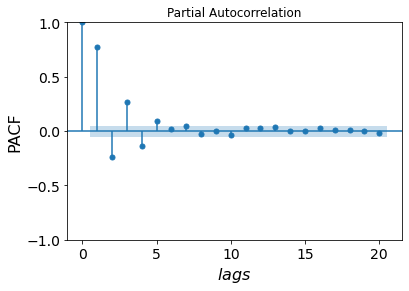

In [377]:
sm.graphics.tsa.plot_pacf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [378]:
#Let's try excetly the same as before
models = [(4,0),(1,1),(2,1),
          (1,2),(2,2),(3,1)] 

In [379]:
M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(s,order=(p,0,q)).fit()
    M[p,q] = ft


4 0
1 1
2 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2
2 2
3 1


In [381]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))

AIC.sort_values('AIC') #This time the 3,1 is the best, the only good one 

,model,AIC,dAIC
5,"(3, 1)",4199.050637,0.000000
4,"(2, 2)",4200.785707,1.735071
3,"(1, 2)",4202.218086,3.167449
0,"(4, 0)",4208.772270,9.721633
2,"(2, 1)",4215.467938,16.417302
1,"(1, 1)",4232.744783,33.694146


In [383]:
#Model ARMA(3,1) and ARMA(2,2) are the best options
#Maybe also (1,2) if the previous two fails somewhere

In [386]:
AIC = AIC.sort_values('AIC').reset_index(drop=True)

In [387]:
params =  AIC.model[0] 
print(params)
M[params].summary() #All significant

(3, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -2093.525
Date:                Tue, 26 Apr 2022   AIC                           4199.051
Time:                        09:35:03   BIC                           4230.930
Sample:                             0   HQIC                          4210.927
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0839      0.112     -0.747      0.455      -0.304       0.136
ar.L1          0.5600      0.066      8.520      0.000       0.431       0.689
ar.L2         -0.0569      0.073     -0.777      0.437      -0.200       0.087
ar.L3          0.1611      0.035      4.553      0.000       0.092       0.230
ma.L1          0.5085      0.064      7.884      0.000       0.382       0.635
sigma2         0.9537      0.035     27.137      0.000       0.885       1.023
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.95   Prob(JB):                         0.98
Heteroskedasticity (H):               0.95   Skew:                             0.01
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [389]:
params =  AIC.model[1] 
print(params)
M[params].summary() # MA-1 is not significant

(2, 2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2094.393
Date:                Tue, 26 Apr 2022   AIC                           4200.786
Time:                        09:35:37   BIC                           4232.665
Sample:                             0   HQIC                          4212.662
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0818      0.123     -0.665      0.506      -0.323       0.159
ar.L1          1.0488      0.122      8.577      0.000       0.809       1.289
ar.L2         -0.1734      0.082     -2.106      0.035      -0.335      -0.012
ma.L1          0.0166      0.118      0.140      0.889      -0.216       0.249
ma.L2         -0.4024      0.060     -6.701      0.000      -0.520      -0.285
sigma2         0.9548      0.035     27.068      0.000       0.886       1.024
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.96   Prob(JB):                         0.91
Heteroskedasticity (H):               0.96   Skew:                             0.02
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [391]:
# Let us look at the residue

In [392]:
rs = {params: M[params].resid for params in AIC.model.iloc[:2]}

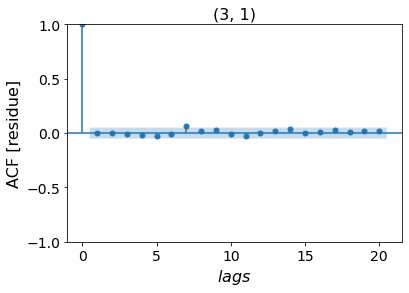

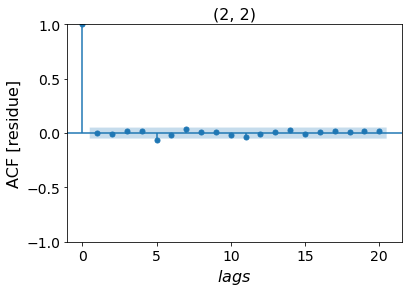

In [393]:
for params,r in rs.items():
    sm.graphics.tsa.plot_acf(r, lags=20)
    plt.xlabel(r'$lags$',fontsize=16)
    plt.ylabel('ACF [residue]',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.title(params,fontsize=16)
    plt.show()

In [ ]:
#It seems that ARMA(4,0) has a lag significant

In [395]:
p,q = AIC.model[0]
print(p,q)
acorr_ljungbox(r,lags=range(p+q+10),model_df=p+q,return_df=True) #Also this one underfit something. Lag-5

3 1


,lb_stat,lb_pvalue
0,12.334431,NaN
1,0.006554,NaN
2,0.174966,NaN
3,0.729814,NaN
4,1.397060,NaN
5,6.718517,0.009542
6,7.034105,0.029687
7,9.568230,0.022616
8,9.678089,0.046214
9,9.730609,0.083238


In [398]:
p,q = AIC.model[1]
print(p,q)
acorr_ljungbox(r,lags=range(p+q+10),model_df=p+q,return_df=True) #Also this one underfit something. Lag-5

2 2


,lb_stat,lb_pvalue
0,12.334431,NaN
1,0.006554,NaN
2,0.174966,NaN
3,0.729814,NaN
4,1.397060,NaN
5,6.718517,0.009542
6,7.034105,0.029687
7,9.568230,0.022616
8,9.678089,0.046214
9,9.730609,0.083238


In [400]:
#They are ok both indeed.
#There is a small problem in the parameter estimations 
#Maybe I could prefer ARMA(2,2) because have less lags in the past,
#But it has also a non significant parameter.

#We don't have other indications purely in-sample to prefer one model or the other